In [592]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd
import numpy as np
import ast

In [595]:
with open('..\\Datasets\\steam_games.json', 'r') as file:
    data_list = [ast.literal_eval(record) for record in file.readlines()]

data = pd.DataFrame(data_list)
data

FileNotFoundError: [Errno 2] No such file or directory: '..\\Datasets\\steam_games.json'

In [524]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  object 
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(1), object(14)
memory usage: 3.7+ MB


In [525]:
# filtrado de datos que no son de formato "YYYY-MM-DD"
data[pd.to_datetime(data['release_date'], format='%Y-%m-%d', errors='coerce').isna()]

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN
10,Qucheza,"[Action, Indie, Simulation, Early Access]",Uncanny Islands,Uncanny Islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"[Early Access, Action, Indie, Simulation, Surv...",NaN,http://steamcommunity.com/app/768570/reviews/?...,[Single-player],NaN,True,768570,Qucheza,NaN,NaN
11,NaN,NaN,Icarus Six Sixty Six,NaN,http://store.steampowered.com/app/724910/Icaru...,NaN,[Casual],NaN,http://steamcommunity.com/app/724910/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,False,724910,NaN,NaN,NaN
19,NaN,NaN,After Life VR,NaN,http://store.steampowered.com/app/772590/After...,NaN,"[Early Access, Indie, VR]",NaN,http://steamcommunity.com/app/772590/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",4.99,True,772590,NaN,NaN,NaN
20,NaN,NaN,Kitty Hawk,NaN,http://store.steampowered.com/app/640250/Kitty...,NaN,"[Early Access, Action, Adventure, Indie, Casual]",1.97,http://steamcommunity.com/app/640250/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",2.99,True,640250,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32087,"Greyson Richey, Nicholas Lives","[Action, Casual, Indie, Simulation]",Lonely Astronaut,Lonely Astronaut,http://store.steampowered.com/app/755830/Lonel...,Coming Soon,"[Casual, Action, Indie, Simulation]",NaN,http://steamcommunity.com/app/755830/reviews/?...,[Single-player],NaN,False,755830,"Greyson Richey,Nicholas Lives",NaN,NaN
32088,rechargecomplete,"[Action, Adventure, Indie, Early Access]",RECHARGE COMPLETE,RECHARGE COMPLETE,http://store.steampowered.com/app/708070/RECHA...,NaN,"[Early Access, Action, Adventure, Indie]",NaN,http://steamcommunity.com/app/708070/reviews/?...,"[Single-player, Steam Achievements]",NaN,True,708070,rechargecomplete,NaN,NaN
32097,Lunar Giant Studios,"[Action, Indie]",Tetrapulse,Tetrapulse,http://store.steampowered.com/app/250440/Tetra...,2016,"[Indie, Action, Co-op]",NaN,http://steamcommunity.com/app/250440/reviews/?...,"[Multi-player, Co-op, Shared/Split Screen, Ste...",NaN,False,250440,The Amiable,NaN,NaN
32123,VersoVR,"[Casual, Indie, Simulation, Sports, Early Access]",Cricket Club,Cricket Club,http://store.steampowered.com/app/772180/Crick...,January 2018,"[Early Access, Indie, Casual, Simulation, Sports]",NaN,http://steamcommunity.com/app/772180/reviews/?...,[Single-player],NaN,True,772180,VersoVR,NaN,NaN


In [526]:
def get_format(date):
    formats_list = ['%Y-%m-%d', '%d.%m.%Y', '%b %Y', '%b-%y', '%B %Y', '%Y', '%d %b, %Y']
    for formats in formats_list:
        try:
            parsed_date = datetime.strptime(date, formats)
            if parsed_date.strftime(formats) == date:
                return parsed_date.date().strftime('%Y-%m-%d')
        except ValueError:
            continue
        except TypeError:
            return np.nan
    return np.nan

data['modify_date'] = data['release_date'].apply(get_format)
data

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,modify_date
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN,2018-01-04
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN,2018-01-04
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN,2017-07-24
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN,2017-12-07
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN,2018-01-04
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,NaN,NaN,2018-01-04
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN,2018-01-04
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns",1 user reviews,NaN,2017-09-02


In [527]:
# Eliminamos los valores NaN de la columna 'modify_date'
data.dropna(subset=['modify_date'], inplace=True, ignore_index=True)
data

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,modify_date
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN,2018-01-04
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN,2018-01-04
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN,2017-07-24
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN,2017-12-07
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,Mixed,NaN,2018-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29889,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",1.69,http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,False,745400,Bidoniera Games,2 user reviews,NaN,2018-01-04
29890,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN,2018-01-04
29891,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,NaN,NaN,2018-01-04
29892,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN,2018-01-04


In [528]:
data['modify_date'] = pd.to_datetime(data['modify_date'])
data['year'] = data['modify_date'].dt.year
data

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,modify_date,year
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN,2018-01-04,2018
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN,2018-01-04,2018
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN,2017-07-24,2017
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN,2017-12-07,2017
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",NaN,http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,False,772540,Trickjump Games Ltd,Mixed,NaN,2018-01-04,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29889,Bidoniera Games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,Kebab it Up!,http://store.steampowered.com/app/745400/Kebab...,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",1.69,http://steamcommunity.com/app/745400/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",1.99,False,745400,Bidoniera Games,2 user reviews,NaN,2018-01-04,2018
29890,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN,2018-01-04,2018
29891,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,NaN,NaN,2018-01-04,2018
29892,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN,2018-01-04,2018


### Function #1

In [529]:
# Se ingresa un año y devuelve un diccionario con los 5 géneros más vendidos en el orden correspondiente.

def get_genre(year):
    filtered_genre = data[data['year'] == year]
    genres = [genre for lista in filtered_genre['genres'] if isinstance(lista, list) for genre in lista if pd.notna(genre)]
    genres_dict = {genre: genres.count(genre) for genre in genres}
    top_genres = dict(sorted(genres_dict.items(), key=lambda x: x[1], reverse=True)[:5])
    return top_genres

In [530]:
get_genre(2018)

{'Indie': 97, 'Action': 57, 'Adventure': 57, 'Casual': 37, 'Simulation': 37}

### Function #2

In [531]:
# Se ingresa un año y devuelve una lista con los juegos lanzados en el año.

def get_games(year):
    filtered_games = data[data['year'] == year]
    games_list = [game for game in filtered_games['app_name'].unique() if pd.notna(game)]
    games_dict = {year: games_list}
    return games_dict

In [532]:
get_games(2014)

{2014: ['Imagine Earth',
  'BeatBlasters III',
  'Blood of the Werewolf',
  "Broken Sword 5 - the Serpent's Curse",
  'Particulars',
  'Episode 3 - The Fisherman and His Wife',
  'Episode 4 - Puss in Boots',
  'Episode 8 - Beauty and the Beast',
  'Episode 5 - The Girl Without Hands',
  'Episode 7 - The Devil and His Three Golden Hairs',
  'Episode 6 - Godfather Death',
  'Episode 9 - The Master Thief',
  'Magic 2014 “Warsmith” Foil Conversion',
  'Episode 10 - The Singing Bone',
  'Rocksmith® 2014 – Aerosmith Song Pack',
  'Magic 2014 “Warsmith” Deck Key',
  'Magic 2014 “Hunting Season” Foil Conversion',
  'Magic 2014 “Hunting Season” Deck Key',
  'Magic 2014 - Deck Pack 3',
  'CONSORTIUM',
  'Nidhogg',
  'Galcon Legends',
  'Awesomenauts - SUSI Announcer',
  'Saints Row IV - Stone Age Pack',
  'Assassin’s Creed® Liberation HD',
  'Train Simulator: West Coast Main Line Over Shap Route Add-On',
  'Assassin’s Creed® Liberation HD - Bonus Pack',
  "Loren The Amazon Princess - The Castle 

In [533]:
len(get_games(2014).get(2014, []))

2843

### Function #3

In [534]:
#  Se ingresa un año y devuelve una lista con los 5 specs que más se repiten en el mismo en el orden correspondiente.
def get_specs(year):
    filtered_specs = data[data['year'] == year]
    specs = [spec for lista in filtered_specs['specs'] if isinstance(lista, list) for spec in lista if pd.notna(spec)]
    specs_dict = {spec: specs.count(spec) for spec in specs}
    top_specs = dict(sorted(specs_dict.items(), key=lambda x: x[1], reverse=True)[:5])
    return top_specs

In [535]:
get_specs(1996)

{'Single-player': 36,
 'Multi-player': 9,
 'Steam Trading Cards': 6,
 'Steam Cloud': 4,
 'Captions available': 3}

### Function #4

In [536]:
#  Cantidad de juegos lanzados en un año con early access

def get_early_access(year):
    filtered_early_access = data[data['year'] == year]
    early_access_count = filtered_early_access[filtered_early_access['early_access'] == True].shape[0]
    early_access_dict = {year: early_access_count}
    return early_access_dict

In [537]:
get_early_access(2016)

{2016: 363}

### Function #5

In [538]:
# Según el año de lanzamiento, se devuelve un diccionario con la cantidad de registros que se encuentren categorizados con un análisis de sentimiento.
def get_sentiment(year):
    sentiments = ['Mixed', 'Mostly Negative', 'Mostly Positive', 'Negative', 'Overwhelmingly Negative',
                  'Overwhelmingly Positive', 'Positive', 'Very Negative', 'Very Positive']
    filtered_sentiment = data[data['year'] == year]
    filtered_sentiment = filtered_sentiment[filtered_sentiment['sentiment'].isin(sentiments)]
    sentiment_list = [x for x in filtered_sentiment['sentiment'] if pd.notna(x)]
    sentiment_dict = {sentiment: sentiment_list.count(sentiment) for sentiment in sentiment_list}
    return dict(sorted(sentiment_dict.items(), key=lambda x: x[1], reverse=True))

In [539]:
get_sentiment(2014)

{'Mixed': 468,
 'Very Positive': 431,
 'Mostly Positive': 335,
 'Positive': 238,
 'Mostly Negative': 99,
 'Overwhelmingly Positive': 37,
 'Negative': 27,
 'Very Negative': 7,
 'Overwhelmingly Negative': 1}

### Function #6

In [540]:
# Top 5 juegos, según año, con mayor metascore.
def get_metascore(year):
    filtered_metascore = data[(data['year'] == year) & (data['metascore'] != 'NA')]
    filtered_metascore = filtered_metascore.dropna(subset=['metascore'])
    sorted_metascore = filtered_metascore.sort_values('metascore', ascending=False)
    top_data = sorted_metascore.head(5)[['app_name', 'metascore']]
    if top_data.empty:
        metascore_dict = {'Data not found'}
    else:
        metascore_dict = top_data.set_index('app_name')['metascore'].to_dict()
    return metascore_dict

In [541]:
get_metascore(2012)

{'Batman: Arkham City - Game of the Year Edition': 91,
 'Dishonored': 91,
 'Mark of the Ninja': 91,
 'XCOM: Enemy Unknown': 89}

## EDA (Análisis Exploratorio de Datos)

### 1. Preprocesamiento de datos

In [542]:
data[['genres', 'discount_price', 'early_access', 'metascore', 'sentiment', 'year', 'price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          28660 non-null  object 
 1   discount_price  204 non-null    float64
 2   early_access    29894 non-null  bool   
 3   metascore       2623 non-null   object 
 4   sentiment       23156 non-null  object 
 5   year            29894 non-null  int32  
 6   price           28818 non-null  object 
dtypes: bool(1), float64(1), int32(1), object(4)
memory usage: 1.3+ MB


In [543]:
eda_data = data[['genres', 'early_access', 'sentiment', 'year', 'price']]
eda_data

,genres,early_access,sentiment,year,price
0,"[Action, Casual, Indie, Simulation, Strategy]",False,NaN,2018,4.99
1,"[Free to Play, Indie, RPG, Strategy]",False,Mostly Positive,2018,Free To Play
2,"[Casual, Free to Play, Indie, Simulation, Sports]",False,Mostly Positive,2017,Free to Play
3,"[Action, Adventure, Casual]",False,NaN,2017,0.99
4,"[Action, Adventure, Simulation]",False,Mixed,2018,3.99
...,...,...,...,...,...
29889,"[Action, Adventure, Casual, Indie]",False,2 user reviews,2018,1.99
29890,"[Casual, Indie, Simulation, Strategy]",False,NaN,2018,1.99
29891,"[Casual, Indie, Strategy]",False,NaN,2018,4.99
29892,"[Indie, Racing, Simulation]",False,NaN,2018,1.99


In [544]:
eda_data.head()

,genres,early_access,sentiment,year,price
0,"[Action, Casual, Indie, Simulation, Strategy]",False,NaN,2018,4.99
1,"[Free to Play, Indie, RPG, Strategy]",False,Mostly Positive,2018,Free To Play
2,"[Casual, Free to Play, Indie, Simulation, Sports]",False,Mostly Positive,2017,Free to Play
3,"[Action, Adventure, Casual]",False,NaN,2017,0.99
4,"[Action, Adventure, Simulation]",False,Mixed,2018,3.99


In [545]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28660 non-null  object
 1   early_access  29894 non-null  bool  
 2   sentiment     23156 non-null  object
 3   year          29894 non-null  int32 
 4   price         28818 non-null  object
dtypes: bool(1), int32(1), object(3)
memory usage: 846.7+ KB


### Manejo de datos nulos

In [546]:
# Eliminar filas con valores nulos en las columnas seleccionadas
eda_data.dropna(subset=['genres', 'sentiment', 'price'], inplace=True, ignore_index=True)

C:\Users\bianc\AppData\Local\Temp\ipykernel_12748\3907510731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_data.dropna(subset=['genres', 'sentiment', 'price'], inplace=True, ignore_index=True)


In [547]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21806 entries, 0 to 21805
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        21806 non-null  object
 1   early_access  21806 non-null  bool  
 2   sentiment     21806 non-null  object
 3   year          21806 non-null  int32 
 4   price         21806 non-null  object
dtypes: bool(1), int32(1), object(3)
memory usage: 617.7+ KB


### Limpieza de datos columna: 'price'

Valores únicos de la columna 'price'

In [548]:
print(eda_data['price'].unique())

['Free To Play' 'Free to Play' 3.99 1.59 0.99 9.99 6.99 10.99 1.99 39.99
 'Free' 4.99 19.99 7.49 14.99 8.99 2.99 12.99 5.99 7.99 2.49 15.99 1.25
 29.99 24.99 17.99 61.99 3.49 18.99 11.99 13.99 'Free Demo'
 'Play for Free!' 34.99 1.49 32.99 99.99 14.95 59.99 69.99 79.99 49.99 5.0
 13.98 29.96 109.99 16.99 149.99 771.71 'Install Now' 21.99
 'Play WARMACHINE: Tactics Demo' 0.98 139.92 'Free Mod' 54.99 64.99 74.99
 'Install Theme' 0.89 0.5 'Play Now' 89.99 299.99 1.29 119.99 44.99 3.0
 15.0 5.49 23.99 49.0 10.93 1.39 'Free HITMAN™ Holiday Pack' 36.99 4.49
 2.0 4.0 1.95 1.5 199.0 189.0 6.66 179.0 26.99 399.99 31.99 399.0 20.0
 40.0 3.33 320.0 38.85 27.49 20.99 27.99 129.99 16.06 4.68 44.98 202.76
 199.99 2.3 0.95 172.24 2.97 10.96 19.95 10.0 30.0 6.48 1.0 11.15
 'Play the Demo' 99.0 87.94 0.49 9.98 9.95 7.0 12.89 6.49 1.87 42.99 41.99
 289.99 'Free to Try' 23.96 5.65 12.0 13.37 189.96 59.95 19.98 160.91
 'Free to Use' 'Third-party']


Valores únicos no numéricos de la columna 'price'

In [549]:
values_non_num = eda_data['price'][~eda_data['price'].apply(pd.to_numeric, errors='coerce').notna()].unique().tolist()
print(values_non_num)

['Free To Play', 'Free to Play', 'Free', 'Free Demo', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo', 'Free Mod', 'Install Theme', 'Play Now', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free to Use', 'Third-party']


Dado que los valores como 'Free Demo', 'Install Now', 'Play for Free!', 'Play WARMACHINE: Tactics Demo', 'Free Mod', 'Install Theme', 'Play Now', etc., no proporcionan información sobre el precio real del juego, son eliminados. Sin embargo, los valores 'Free to play', se mantendrán y serán convertidos al valor de 0.

In [550]:
values_to_drop = ['Free Demo', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo', 'Free Mod', 'Install Theme', 'Play Now', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free to Use', 'Third-party']

val_dict = {value: np.nan for value in values_to_drop}
eda_data.loc[:, 'price'] = eda_data['price'].replace(val_dict)

In [551]:
values_to_modify = ['Free To Play', 'Free to Play', 'Free']
val_dict_modify = {value: 0 for value in values_to_modify}
eda_data.loc[:, 'price'] = eda_data['price'].replace(val_dict_modify)

In [552]:
eda_data['price'] = pd.to_numeric(eda_data['price'], errors='coerce')
print(eda_data['price'].dtype)

float64


C:\Users\bianc\AppData\Local\Temp\ipykernel_12748\1923996582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_data['price'] = pd.to_numeric(eda_data['price'], errors='coerce')


## Limpieza de datos columna 'sentiment'

In [553]:
print(eda_data['sentiment'].unique().tolist())

['Mostly Positive', 'Mixed', '1 user reviews', '3 user reviews', 'Very Positive', 'Overwhelmingly Positive', '6 user reviews', '5 user reviews', '2 user reviews', 'Positive', 'Mostly Negative', 'Very Negative', '9 user reviews', '8 user reviews', 'Negative', '7 user reviews', '4 user reviews', 'Overwhelmingly Negative']


### Convirtiendo datos no informativos a NaN

In [554]:
values_non_inf = ['1 user reviews', '3 user reviews', '6 user reviews', '5 user reviews', '2 user reviews', '9 user reviews', '8 user reviews', '7 user reviews', '4 user reviews']
non_info_dict = {value: np.nan for value in values_non_inf}
eda_data.loc[:, 'sentiment'] = eda_data['sentiment'].replace(non_info_dict)

In [555]:
eda_data.dropna(subset=['sentiment', 'price'], ignore_index=True, inplace=True)

C:\Users\bianc\AppData\Local\Temp\ipykernel_12748\3989536330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_data.dropna(subset=['sentiment', 'price'], ignore_index=True, inplace=True)


In [556]:
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13654 entries, 0 to 13653
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        13654 non-null  object 
 1   early_access  13654 non-null  bool   
 2   sentiment     13654 non-null  object 
 3   year          13654 non-null  int32  
 4   price         13654 non-null  float64
dtypes: bool(1), float64(1), int32(1), object(2)
memory usage: 386.8+ KB


## 2.Visualizar las caracteristicas de las variables

### Resumen estadístico de las variables numéricas price y year

In [557]:
eda_data.describe()

,year,price
count,13654.000000,13654.000000
mean,2014.150579,10.080921
std,3.877608,14.252053
min,1983.000000,0.000000
25%,2014.000000,2.990000
50%,2015.000000,6.990000
75%,2016.000000,12.990000
max,2021.000000,771.710000


## Analisis 'year'

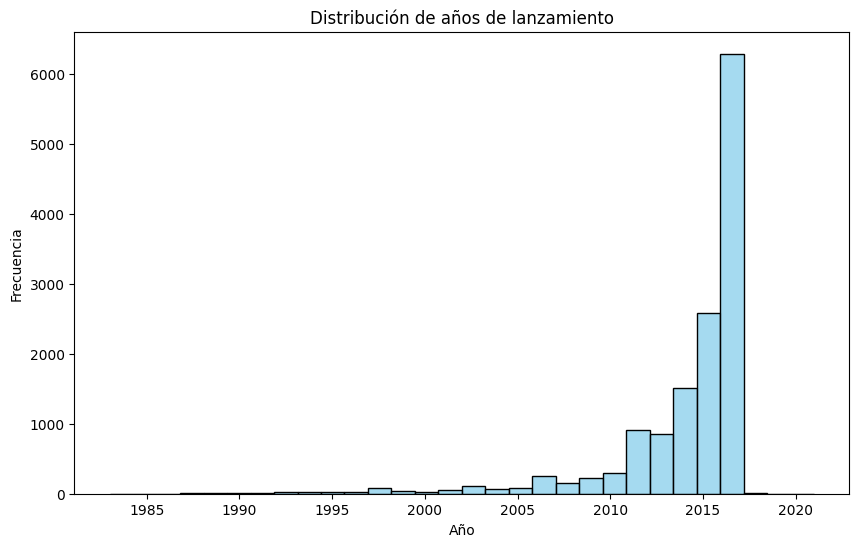

In [558]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_data['year'], bins=30, kde=False, color='skyblue')
plt.title('Distribución de años de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


## Análisis de 'price'

### a) Histograma de precios

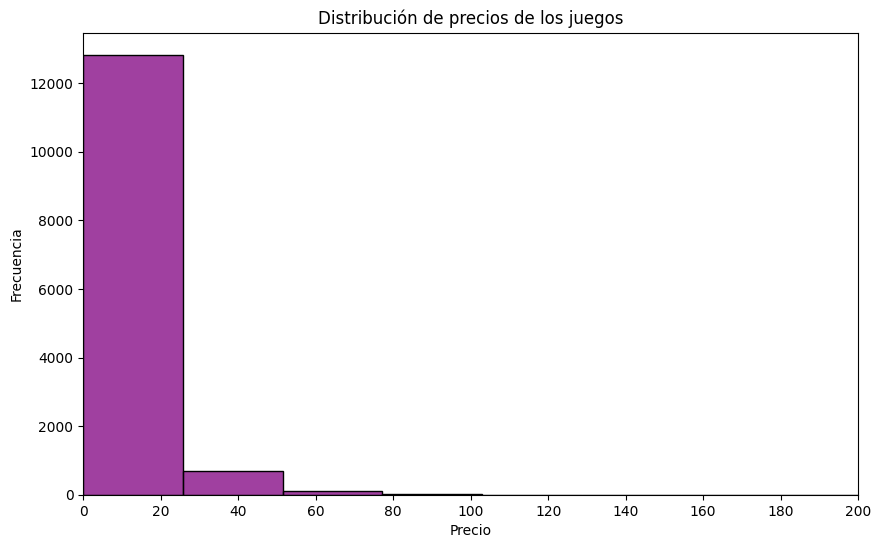

In [559]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_data['price'], bins=30, kde=False, color='purple')
plt.title('Distribución de precios de los juegos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.xlim(0, 200)  # Establecer el rango del eje x de 0 a 200
plt.xticks(range(0, 201, 20))  # Mostrar los ticks del eje x de 0 a 200 en intervalos de 20
plt.show()



### b) Boxplot de precios

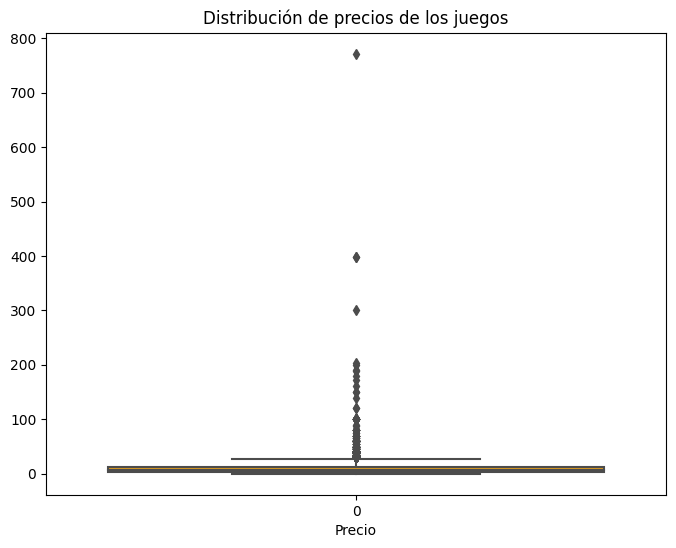

In [560]:
plt.figure(figsize=(8, 6))
sns.boxplot(eda_data['price'], color='orange')
plt.title('Distribución de precios de los juegos')
plt.xlabel('Precio')
plt.show()


### c) Gráfico de barras para rangos de precios

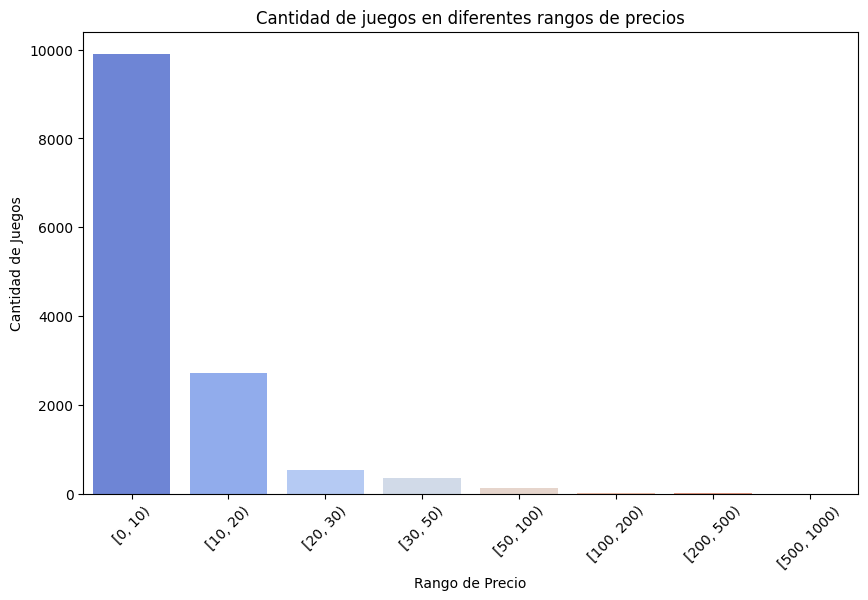

In [561]:
price_ranges = pd.cut(eda_data['price'], bins=[0, 10, 20, 30, 50, 100, 200, 500, 1000], right=False)
plt.figure(figsize=(10, 6))
sns.countplot(x=price_ranges, palette='coolwarm')
plt.title('Cantidad de juegos en diferentes rangos de precios')
plt.xlabel('Rango de Precio')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()


Podemos observar outliers significativos en el segundo gráfico, y una mayor concentración de frecuencia de precios en el rango de [0 y 55]. Por lo tanto, se eliminaron los precios mayores a 55.

In [562]:
# Eliminación de precios mayor a 55
eda_data = eda_data.loc[eda_data['price'] <= 55]

## Análisis de 'genres'

Para este caso, se convirtió la columna genero en diferentes columnas binarias (1: si el género está presente, 0: si no está presente). Utilizamos el método de codificación llamado 'one-hot encoding'

In [584]:
def predict_price(genre, year, sentiment, early_access):
    # Codificar el género como binario
    eda_data['genre_encoded'] = eda_data['genres'].apply(lambda x: genre in x)

    # Convertir el sentimiento en valores numéricos
    sentiment_mapping = {'Mixed': 0, 'Very Positive': 1, 'Positive': 2, 'Mostly Positive': 3,'Mostly Negative': 4, 'Overwhelmingly Positive': 5, 'Negative': 6, 'Very Negative': 7, 'Overwhelmingly Negative': 8}
    sentiment_numeric = sentiment_mapping[sentiment]

    # Crear la columna 'sentiment_numeric' en eda_data
    eda_data['sentiment_numeric'] = eda_data['sentiment'].apply(lambda x: sentiment_mapping[x])

    # Crear el conjunto de características (X)
    X = eda_data[['genre_encoded', 'year', 'early_access', 'sentiment_numeric']]

    # Crear el conjunto de etiquetas (y)
    y = eda_data['price']

    # Crear y ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Crear un diccionario con los valores de las características para la predicción
    input_data = {
        'genre_encoded': genre in eda_data['genres'],
        'year': year,
        'early_access': early_access,
        'sentiment_numeric': sentiment_numeric
    }

    # Crear una fila de datos a partir del diccionario
    input_row = pd.DataFrame([input_data])

    # Realizar la predicción
    y_predict = model.predict(input_row)

    # Calcular el RMSE a partir del MSE
    rmse = np.sqrt(np.mean((y_predict - eda_data['price'])**2))

    result = {'price': y_predict[0], 'RMSE': rmse}
    return result


In [585]:
predict_price(genre='Casual', year=2022, sentiment='Mostly Positive', early_access=False)

C:\Users\bianc\AppData\Local\Temp\ipykernel_12748\2878619693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_data['genre_encoded'] = eda_data['genres'].apply(lambda x: genre in x)
C:\Users\bianc\AppData\Local\Temp\ipykernel_12748\2878619693.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_data['sentiment_numeric'] = eda_data['sentiment'].apply(lambda x: sentiment_mapping[x])


{'price': 10.806001996834397, 'RMSE': 9.021043831366878}

In [499]:
#eda_data = eda_data.loc[:, eda_data.columns != 'genre_encoded'] # Eliminar columna

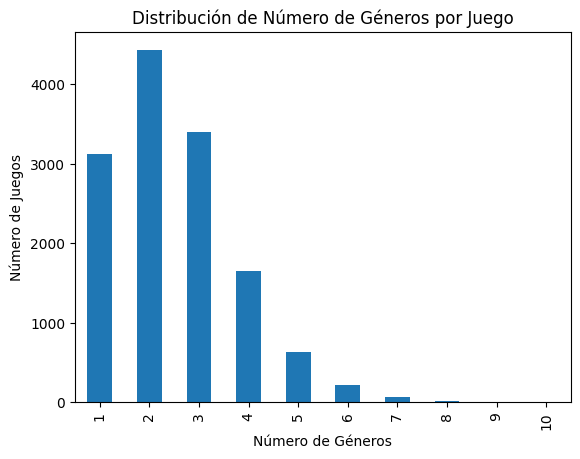

In [569]:
genre_counts = eda_data['genres'].apply(lambda x: len(x))
genre_counts.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Número de Géneros')
plt.ylabel('Número de Juegos')
plt.title('Distribución de Número de Géneros por Juego')
plt.show()

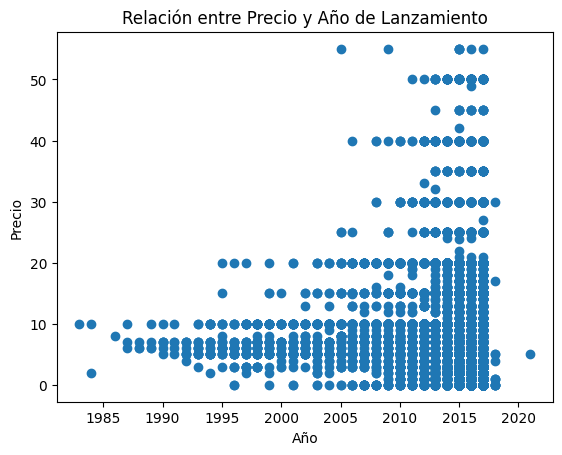

In [570]:
# Gráfico de dispersión precio vs año
plt.scatter(eda_data['year'], eda_data['price'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Relación entre Precio y Año de Lanzamiento')
plt.show()

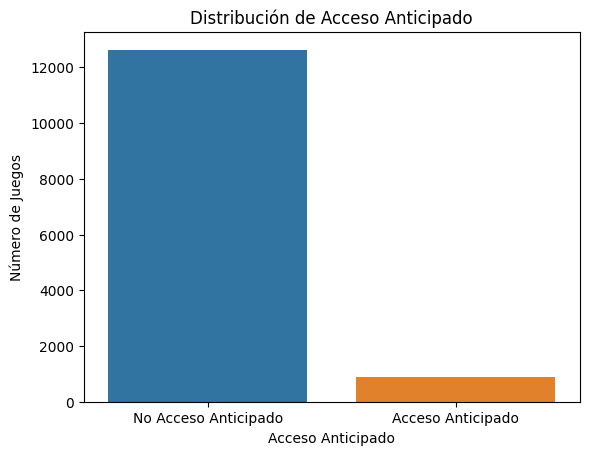

In [571]:
# Gráfico de barras para acceso anticipado
sns.countplot(x='early_access', data=eda_data)
plt.xticks(ticks=[0, 1], labels=['No Acceso Anticipado', 'Acceso Anticipado'])
plt.xlabel('Acceso Anticipado')
plt.ylabel('Número de Juegos')
plt.title('Distribución de Acceso Anticipado')
plt.show()

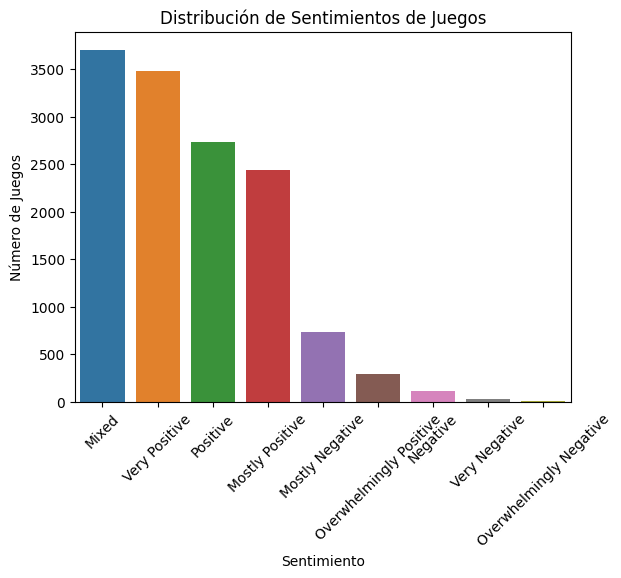

In [572]:
# Gráfico de barras para sentimiento
sns.countplot(x='sentiment', data=eda_data, order=eda_data['sentiment'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Sentimiento')
plt.ylabel('Número de Juegos')
plt.title('Distribución de Sentimientos de Juegos')
plt.show()

Debido a la poca información de datos para algunos géneros como se aprecia en el gráfico, se procedió a reducir las opciones de géneros, ya que el modelo podría tener menos eficiencia.

Los géneros a no tomar en cuenta serán: ['Animation &amp; Modeling', 'Video Production', 'Software Training', 'Photo Editing', 'Web Publishing', 'Design &amp; Illustration', 'Accounting', 'Utilities', 'Education', 'Audio Production']

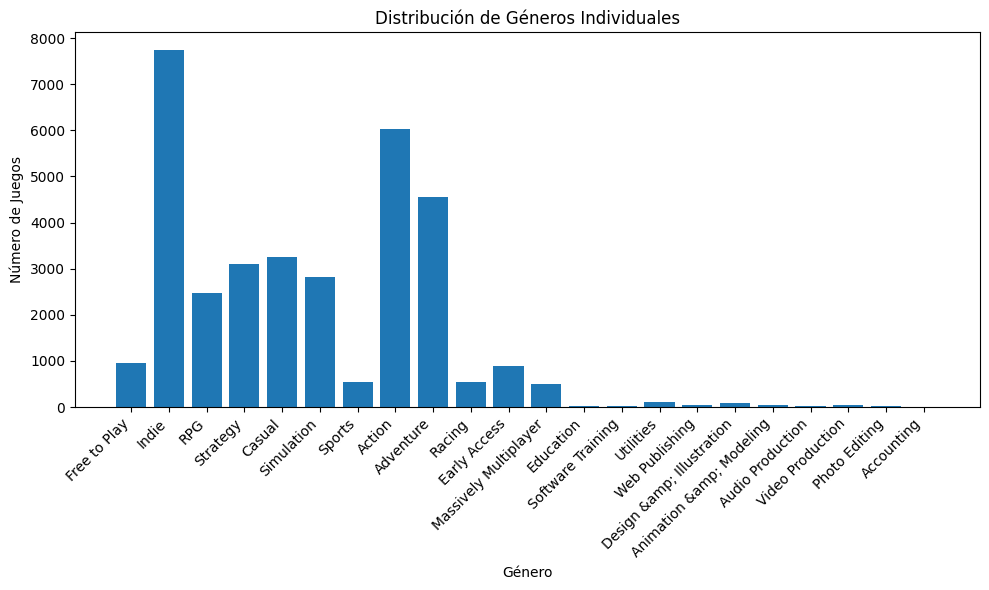

In [581]:
from collections import Counter

# Crear una lista plana de todos los géneros en el conjunto de datos
all_genres = [genre for genres_list in eda_data['genres'] for genre in genres_list]

# Contar cuántas veces aparece cada género
genre_counts = Counter(all_genres)

# Crear un gráfico de barras para géneros individuales
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.title('Distribución de Géneros Individuales')
plt.tight_layout()
plt.show()


In [582]:
 # Lista de géneros no deseados
useless_genres = ['Animation &amp; Modeling', 'Video Production', 'Software Training', 'Photo Editing', 'Web Publishing', 'Design &amp; Illustration', 'Accounting', 'Utilities', 'Education', 'Audio Production']


def filter_unwanted_genres(genre_list):
    return [genre for genre in genre_list if genre not in useless_genres]

# Aplicar la función de filtrado a la columna 'genres'
eda_data['genres'] = eda_data['genres'].apply(filter_unwanted_genres)


C:\Users\bianc\AppData\Local\Temp\ipykernel_12748\723597223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_data['genres'] = eda_data['genres'].apply(filter_unwanted_genres)


In [583]:
eda_data

,genres,early_access,sentiment,year,price,genre_encoded,sentiment_numeric
0,"[Free to Play, Indie, RPG, Strategy]",False,Mostly Positive,2018,0.00,False,3
1,"[Casual, Free to Play, Indie, Simulation, Sports]",False,Mostly Positive,2017,0.00,True,3
2,"[Action, Adventure, Simulation]",False,Mixed,2018,3.99,False,0
3,"[Action, Indie, Racing]",False,Very Positive,1997,9.99,False,1
4,[Action],False,Overwhelmingly Positive,1998,9.99,False,5
...,...,...,...,...,...,...,...
13649,"[Action, Casual, Indie]",False,Mixed,2003,6.99,True,0
13650,[Action],False,Very Positive,2003,4.99,False,1
13651,"[Strategy, RPG, Indie]",False,Positive,2003,19.99,False,2
13652,[Action],False,Overwhelmingly Positive,2004,14.99,False,5
